# Proyecto #

In [249]:
# Instalación de dependencias:
#!pip install nltk

# Entedimiento de los Datos #

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import replace
import re
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestCentroid

In [251]:
df = pd.read_csv('DatosSuicidio/SuicidiosProyecto.csv')
df.drop(["Unnamed: 0"], axis = 1, inplace=True)

# Preparación de los datos

In [252]:
df.head(15)

,text,class
0,i want to destroy myselffor once everything wa...,suicide
1,I kinda got behind schedule with learning for ...,non-suicide
2,I'm just not sure anymoreFirst and foremost: I...,suicide
3,please give me a reason to liveThats too much ...,suicide
4,27f struggling to find meaning moving forwardI...,suicide
5,Let’s get this bread 😎 Anyone know any good ba...,non-suicide
6,"Day 126 of posting random ""fun"" facts everyday...",non-suicide
7,Little brother is self mutilating. Please help...,suicide
8,Why do women always go in groups to their wash...,non-suicide
9,Did you guys know that there's no school for g...,non-suicide


In [253]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [254]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

In [255]:
def text(text):
    if('suicide'==text):
        return 1
    if('non-suicide'==text):
        return 0
    return None
df['class'] = df['class'].apply(text)


In [256]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size = 0.2, random_state = 1)

## Preparación BOW


In [257]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words, lowercase = True)

In [258]:
X_bow_train = bow.fit_transform(X_train)

In [259]:
X_bow_test = bow.transform(X_test)

In [260]:
len(bow.vocabulary_)

158957

## Preparación tf-idf

In [261]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words, lowercase = True)

In [262]:
X_tfidf_train = tfidf.fit_transform(X_train)

In [263]:
X_tfidf_test = tfidf.transform(X_test)

In [264]:
len(tfidf.vocabulary_)

158957

# Modelamiento #

## BOW

### Primer Algoritmo-RandomForest
(Santiago Pardo)

In [265]:
bow_model_RF = RandomForestClassifier(random_state = 2, max_depth=750)
bow_model_RF.fit(X_bow_train, y_train)

RandomForestClassifier(max_depth=750, random_state=2)

### Segundo Algoritmo-LinearSVC
(Sebastián Pinzón)

In [266]:
bow_model_linear = LinearSVC()
bow_model_linear.fit(X_bow_train, y_train)
LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=0.5, max_iter=10000)

### Tercer Algoritmo-Nearest Centroid Classifier
(Daniel Reyes)

In [267]:
bow_model_NB = NearestCentroid()
bow_model_NB.fit(X_bow_train, y_train)

NearestCentroid()

## TF-IDF

### Primer Algoritmo-RandomForest
(Santiago Pardo)

In [268]:
tfidf_model_RF = RandomForestClassifier(random_state = 2, max_depth=750)
tfidf_model_RF.fit(X_tfidf_train, y_train)

RandomForestClassifier(max_depth=750, random_state=2)

### Segundo Algoritmo-LinearSVC
(Sebastián Pinzón)

In [293]:
from re import T


tfidf_model_linear = LinearSVC(C=0.588, dual=True, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.00001,
          verbose=0)
tfidf_model_linear.fit(X_tfidf_train, y_train)



LinearSVC(C=0.588, max_iter=10000, random_state=0, tol=1e-05)

### Tercer Algoritmo-Nearest Centroid Classifier
(Daniel Reyes)

In [270]:
tfidf_model_NB = NearestCentroid()
tfidf_model_NB.fit(X_tfidf_train, y_train)

NearestCentroid()

# Análisis de los resultados #

## BOW

### Primer Algoritmo-RandomForest
(Santiago Pardo)

<AxesSubplot: >

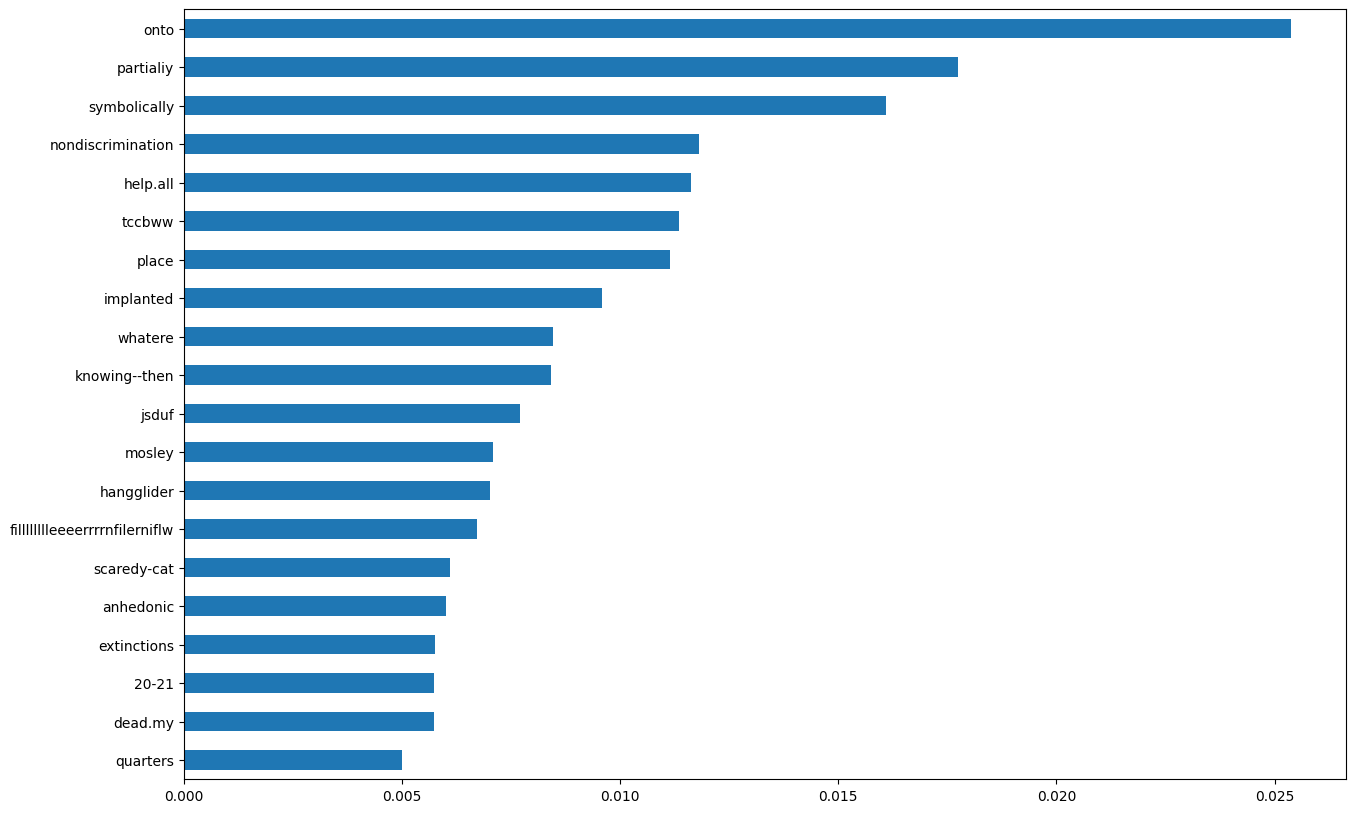

In [271]:
pd.Series(bow_model_RF.feature_importances_, index = bow.vocabulary_).sort_values().tail(20).plot.barh(figsize = (15, 10))

In [272]:
y_train_bow_RF_predict = bow_model_RF.predict(X_bow_train)
y_test_bow_RF_predict = bow_model_RF.predict(X_bow_test)

#### Metricas Train

Accuracy: 99.9489%
Precision: 100.0000%
Recall: 99.8834%
F1: 99.9416%


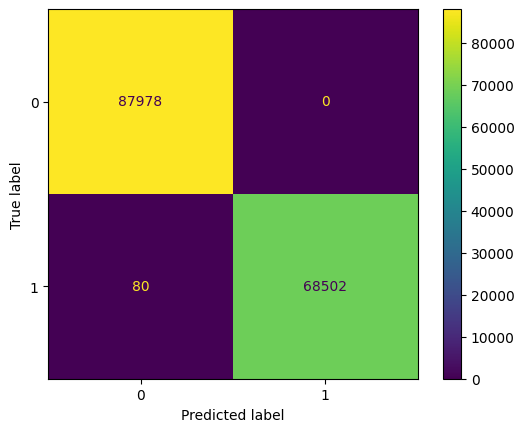

In [273]:
print(f"Accuracy: {accuracy_score(y_train, y_train_bow_RF_predict):.4%}")
print(f'Precision: {precision_score(y_train, y_train_bow_RF_predict):.4%}')
print(f'Recall: {recall_score(y_train, y_train_bow_RF_predict):.4%}')
print(f'F1: {f1_score(y_train, y_train_bow_RF_predict):.4%}')
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_RF_predict)

#### Metricas Test

Accuracy: 90.1303%
Precision: 88.2346%
Recall: 89.0934%
F1: 88.6619%


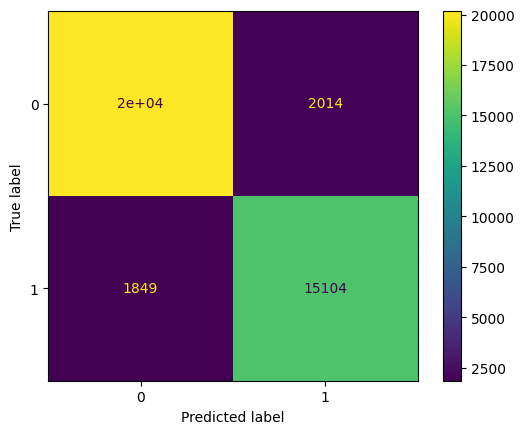

In [274]:
print(f"Accuracy: {accuracy_score(y_test, y_test_bow_RF_predict):.4%}")
print(f'Precision: {precision_score(y_test,y_test_bow_RF_predict):.4%}')
print(f'Recall: {recall_score(y_test,y_test_bow_RF_predict):.4%}')
print(f'F1: {f1_score(y_test, y_test_bow_RF_predict):.4%}')
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_RF_predict)

### Segundo Algoritmo-LinearSVC 
(Sebastián Pinzón)

In [275]:
pd.Series(bow_model_linear.coef_[0], index = bow.vocabulary_.keys()).sort_values().tail(20).keys()

Index(['franke', 'disccusion', 'eht', 'weopons', 'bartlettone', 'pitre',
       'clove', 'jujitsu', 'markers', 'loaned', 'abaeeq', 'antevko',
       'deecided', 'roofing', 'thruwe', 'antoher', 'dww', 'gravel', 'fossils',
       'gma'],
      dtype='object')

In [276]:
y_train_bow_linear_predict = bow_model_linear.predict(X_bow_train)
y_test_bow_linear_predict = bow_model_linear.predict(X_bow_test)

#### Metricas Train

Accuracy: 99.1422%
Precision: 99.1851%
Recall: 98.8539%
F1: 99.0192%


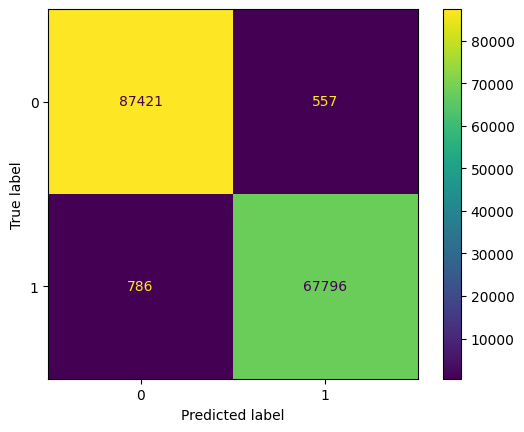

In [277]:
print(f"Accuracy: {accuracy_score(y_train, y_train_bow_linear_predict):.4%}")
print(f'Precision: {precision_score(y_train, y_train_bow_linear_predict):.4%}')
print(f'Recall: {recall_score(y_train, y_train_bow_linear_predict):.4%}')
print(f'F1: {f1_score(y_train, y_train_bow_linear_predict):.4%}')
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_linear_predict)

#### Metricas Test

Accuracy: 92.7823%
Precision: 93.8431%
Recall: 89.1878%
F1: 91.4562%


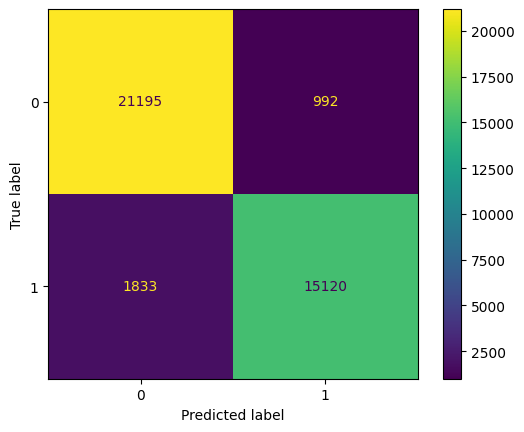

In [278]:
print(f"Accuracy: {accuracy_score(y_test, y_test_bow_linear_predict):.4%}")
print(f'Precision: {precision_score(y_test,y_test_bow_linear_predict):.4%}')
print(f'Recall: {recall_score(y_test,y_test_bow_linear_predict):.4%}')
print(f'F1: {f1_score(y_test, y_test_bow_linear_predict):.4%}')
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_linear_predict)

### Tercer Algoritmo-Nearest Centroid Classifier
(Daniel Reyes)

In [279]:
y_train_bow_NB_predict = bow_model_NB.predict(X_bow_train)
y_test_bow_NB_predict = bow_model_NB.predict(X_bow_test)

#### Metricas Train

Accuracy: 74.0342%
Precision: 83.7058%
Recall: 50.5687%
F1: 63.0483%


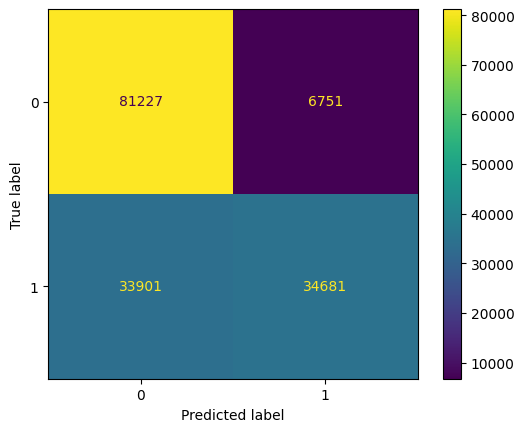

In [280]:
print(f"Accuracy: {accuracy_score(y_train, y_train_bow_NB_predict):.4%}")
print(f'Precision: {precision_score(y_train, y_train_bow_NB_predict):.4%}')
print(f'Recall: {recall_score(y_train, y_train_bow_NB_predict):.4%}')
print(f'F1: {f1_score(y_train, y_train_bow_NB_predict):.4%}')
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_NB_predict)

#### Metricas Test

Accuracy: 74.4021%
Precision: 84.1039%
Recall: 50.4336%
F1: 63.0554%


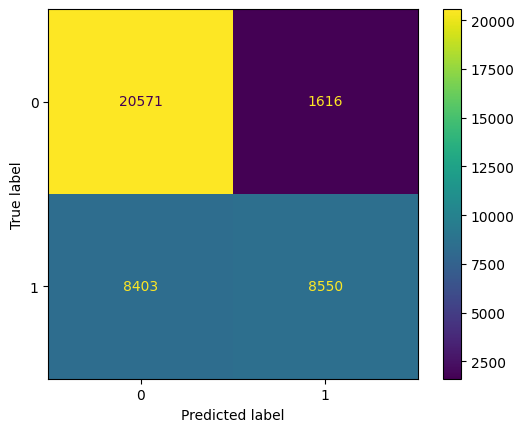

In [281]:
print(f"Accuracy: {accuracy_score(y_test, y_test_bow_NB_predict):.4%}")
print(f'Precision: {precision_score(y_test,y_test_bow_NB_predict):.4%}')
print(f'Recall: {recall_score(y_test,y_test_bow_NB_predict):.4%}')
print(f'F1: {f1_score(y_test, y_test_bow_NB_predict):.4%}')
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_NB_predict)

## TF-IDF

### Primer Algoritmo-RandomForest
(Santiago Pardo)

<AxesSubplot: >

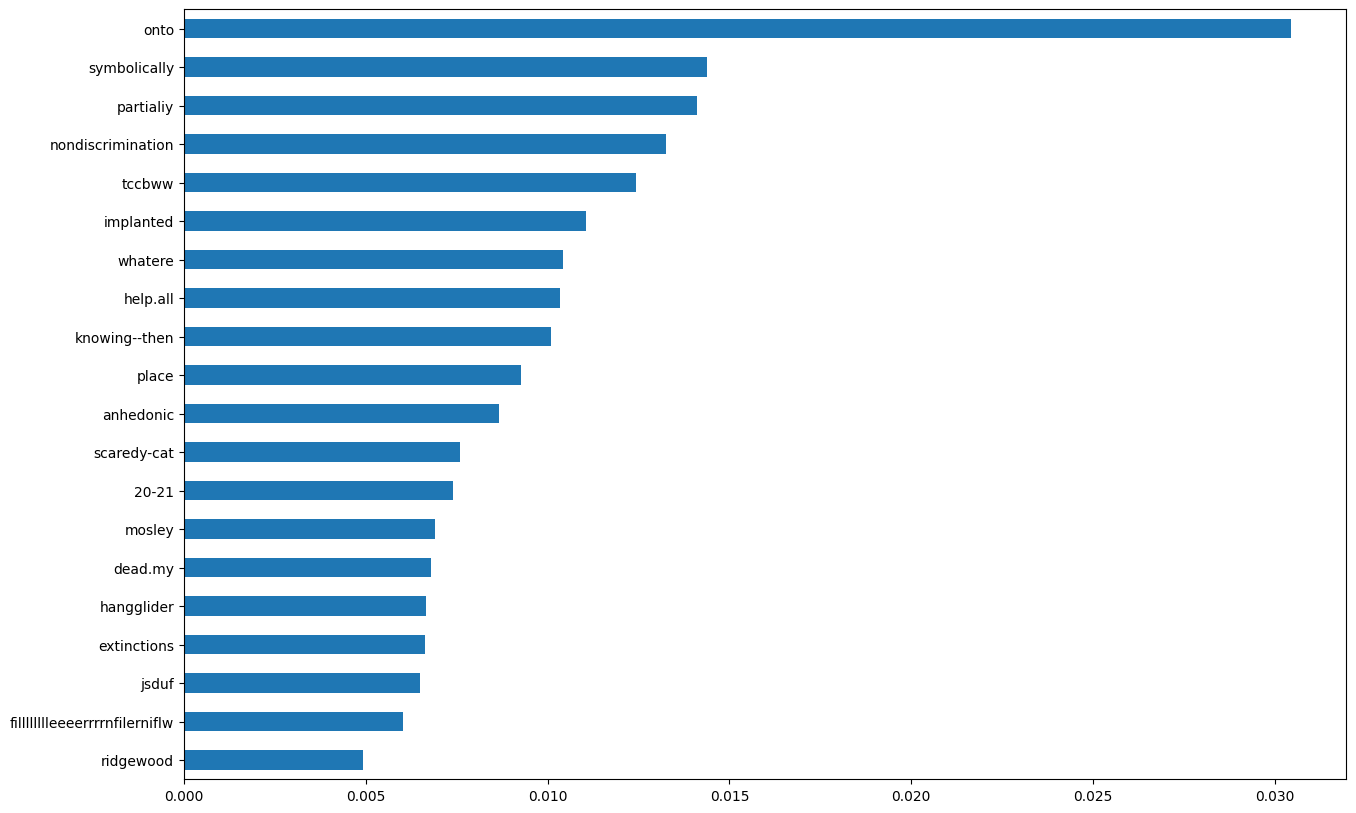

In [282]:
pd.Series(tfidf_model_RF.feature_importances_, index = tfidf.vocabulary_).sort_values().tail(20).plot.barh(figsize = (15, 10))

In [283]:
y_train_tfidf_RF_predict = tfidf_model_RF.predict(X_tfidf_train)
y_test_tfidf_RF_predict = tfidf_model_RF.predict(X_tfidf_test)

#### Metricas Train

Accuracy: 99.9681%
Precision: 100.0000%
Recall: 99.9271%
F1: 99.9635%


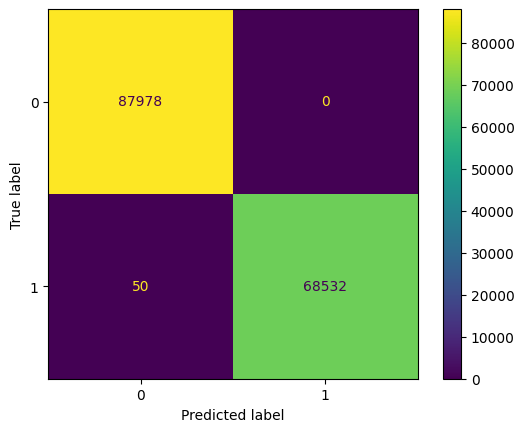

In [284]:
print(f"Accuracy: {accuracy_score(y_train, y_train_tfidf_RF_predict):.4%}")
print(f'Precision: {precision_score(y_train, y_train_tfidf_RF_predict):.4%}')
print(f'Recall: {recall_score(y_train, y_train_tfidf_RF_predict):.4%}')
print(f'F1: {f1_score(y_train, y_train_tfidf_RF_predict):.4%}')
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_RF_predict)

#### Metricas Test

Accuracy: 90.8968%
Precision: 89.7565%
Recall: 89.1583%
F1: 89.4564%


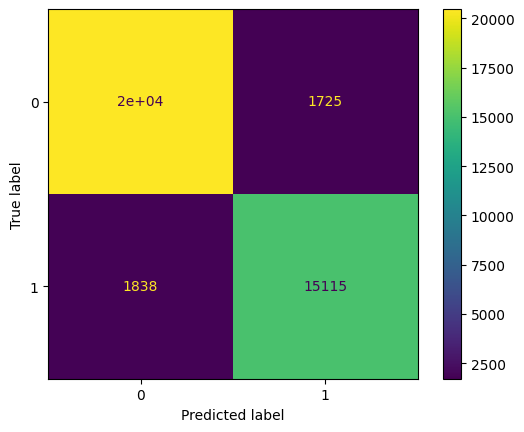

In [285]:
print(f"Accuracy: {accuracy_score(y_test, y_test_tfidf_RF_predict):.4%}")
print(f'Precision: {precision_score(y_test, y_test_tfidf_RF_predict):.4%}')
print(f'Recall: {recall_score(y_test, y_test_tfidf_RF_predict):.4%}')
print(f'F1: {f1_score(y_test, y_test_tfidf_RF_predict):.4%}')
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_RF_predict)

### Segundo Algoritmo-LinearSVC
(Sebastián Pinzón)

In [286]:
pd.Series(tfidf_model_linear.coef_[0], index = tfidf.vocabulary_.keys()).sort_values().tail(20).keys()

Index(['anhedonic', '500,000', 'eht', 'corona's', 'sleepyhead', 'dado',
       'darin's', 'antoher', 'markers', 'kille', 'grail', 'pitre', 'contibe',
       'anti-intellectualism', 'absorb', 'fossils', 'partialiy', 'gma',
       'mosley', 'tccbww'],
      dtype='object')

In [287]:
y_train_tfidf_linear_predict = tfidf_model_linear.predict(X_tfidf_train)
y_test_tfidf_linear_predict = tfidf_model_linear.predict(X_tfidf_test)

#### Metricas Train

Accuracy: 97.0350%
Precision: 96.5370%
Recall: 96.7003%
F1: 96.6186%


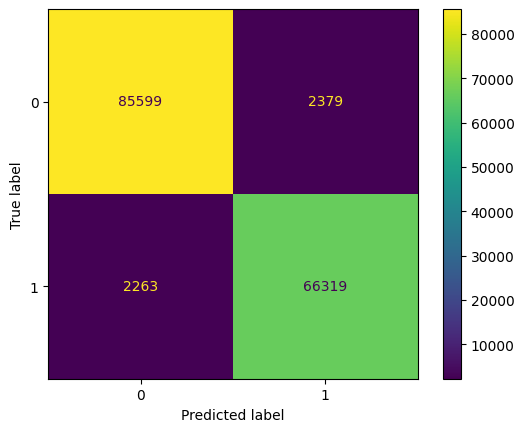

In [288]:
print(f"Accuracy: {accuracy_score(y_train, y_train_tfidf_linear_predict):.4%}")
print(f'Precision: {precision_score(y_train, y_train_tfidf_linear_predict):.4%}')
print(f'Recall: {recall_score(y_train, y_train_tfidf_linear_predict):.4%}')
print(f'F1: {f1_score(y_train, y_train_tfidf_linear_predict):.4%}')
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_linear_predict)

#### Metricas Test

Accuracy: 94.5248%
Precision: 94.5816%
Recall: 92.6680%
F1: 93.6150%


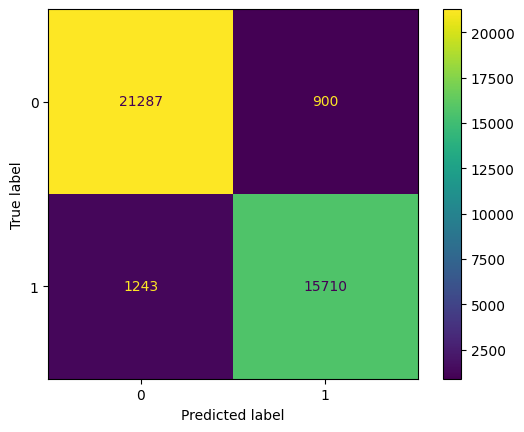

In [289]:
print(f"Accuracy: {accuracy_score(y_test, y_test_tfidf_linear_predict):.4%}")
print(f'Precision: {precision_score(y_test,y_test_tfidf_linear_predict):.4%}')
print(f'Recall: {recall_score(y_test,y_test_tfidf_linear_predict):.4%}')
print(f'F1: {f1_score(y_test, y_test_tfidf_linear_predict):.4%}')
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_linear_predict)

### Tercer Algoritmo Nearest Centroid Classifier
(Daniel Reyes)

In [290]:
y_train_tfidf_NB_predict = tfidf_model_NB.predict(X_tfidf_train)
y_test_tfidf_NB_predict = tfidf_model_NB.predict(X_tfidf_test)

#### Metricas Test

Accuracy: 82.7497%
Precision: 82.9192%
Recall: 76.3480%
F1: 79.4981%


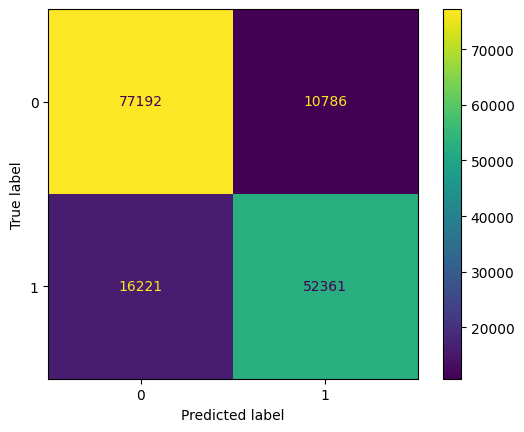

In [291]:
print(f"Accuracy: {accuracy_score(y_train, y_train_tfidf_NB_predict):.4%}")
print(f'Precision: {precision_score(y_train, y_train_tfidf_NB_predict):.4%}')
print(f'Recall: {recall_score(y_train, y_train_tfidf_NB_predict):.4%}')
print(f'F1: {f1_score(y_train, y_train_tfidf_NB_predict):.4%}')
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_NB_predict)

#### Metricas Train

Accuracy: 83.1732%
Precision: 82.7303%
Recall: 77.2843%
F1: 79.9146%


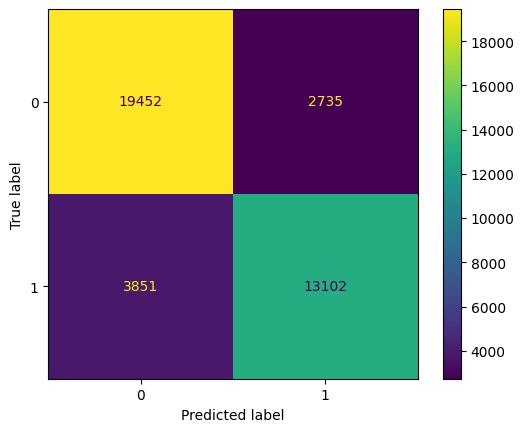

In [292]:
print(f"Accuracy: {accuracy_score(y_test, y_test_tfidf_NB_predict):.4%}")
print(f'Precision: {precision_score(y_test,y_test_tfidf_NB_predict):.4%}')
print(f'Recall: {recall_score(y_test,y_test_tfidf_NB_predict):.4%}')
print(f'F1: {f1_score(y_test, y_test_tfidf_NB_predict):.4%}')
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_NB_predict)